# AI for Medical Diagnosis

## Basic Imports

In [35]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [18]:
# Reading the training data set
basepath = Path('/Users/monsharm6/Projects/AIforMedicalDiagnosis/AI4M/AI for Medical Diagnosis/Week1/nih')
filename = 'train-small.csv'

In [22]:
train_df = pd.read_csv(os.path.join(basepath, filename))
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in the training data set')
#print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')

There are 875 rows and 16 columns in the training data set


In [23]:
train_df.head()

,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00027079_001.png,0,0,0,0,0,0,0,0,0,0,0,27079,1,0,0
1,00004477_001.png,1,0,0,0,1,0,0,0,0,0,0,4477,0,0,0
2,00018530_002.png,0,0,0,0,0,0,0,0,0,0,0,18530,0,0,0
3,00026928_001.png,0,0,0,0,0,0,0,0,1,0,0,26928,0,0,0
4,00016687_000.png,0,0,0,0,0,0,0,0,0,0,1,16687,0,0,0


In [53]:
train_df.columns

Index(['Image', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
       'Nodule', 'PatientId', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax'],
      dtype='object')

## Unique ID check

In [33]:
# ParentId contains unique ID for each patient. 
print(f'The total unique patients {train_df.PatientId.count()} from those in the total patients {train_df.PatientId.value_counts().shape[0]}.')

The total unique patients 875 from those in the total patients 833.


In [43]:
images = train_df['Image'].values
print(train_df['Image'].count())

875


**Take-away** There are some patients that have more than one record in the training dataset.

## Data Visualization

Display Random Images


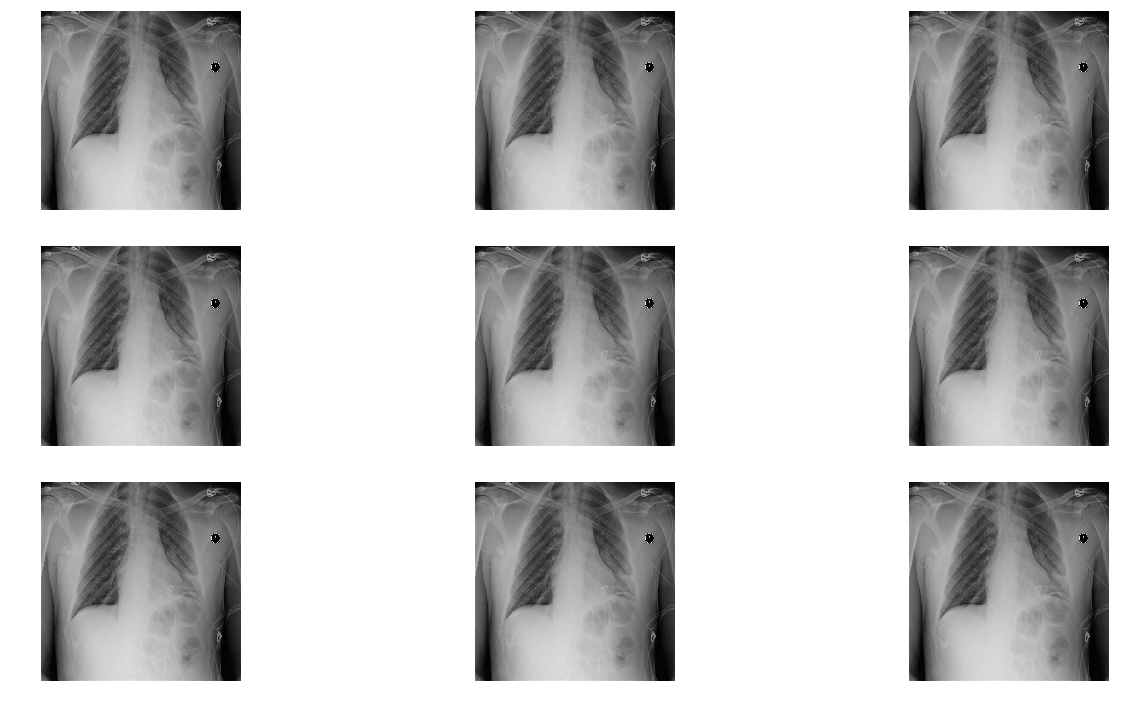

In [39]:
# Using the 'image' column in the data set to visualize
images = train_df['Image'].values

# Extract 9 random images from it
random_images = [np.random.choice(images) for i in range(9)]

# Location of the image directory
img_dir_sub = 'images-small/00028040_002.png'
img_dir = os.path.join(basepath, img_dir_sub)

print('Display Random Images')

#Adjust the size of your images
plt.figure(figsize=(20,10))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3,3, i+1)
    #img = plt.imread(os.path.join(img_dir, random_images[i]))
    img = plt.imread(img_dir)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()

## Investigate a single image

Dimensions of the image are 1024 and 1024 pixels height, one single color channel
The maximum pixel value is 1.0000 and the minimum pixel value is 0.0000
The mean value of the pixels is 0.4766 and the standard deviation is 0.2059


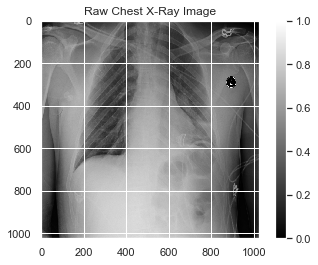

In [49]:
# Get the first image listed on the dataframe. 
raw_image = plt.imread(img_dir)
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X-Ray Image')
print(f'Dimensions of the image are {raw_image.shape[0]} and {raw_image.shape[1]} pixels height, one single color channel')
print(f'The maximum pixel value is {raw_image.max():.4f} and the minimum pixel value is {raw_image.min():.4f}')
print(f'The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}')

## Investigate pixel value distribution

Text(0, 0.5, '# Pixels in Image')

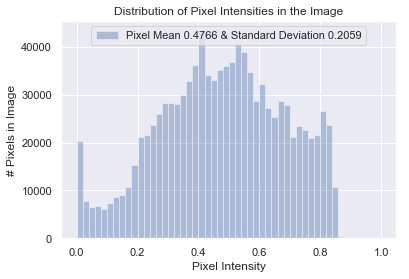

In [50]:
# Plot a histogram of the distribution of the pixels
sns.distplot(raw_image.ravel(), 
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

## Image Preprocessing in Keras

Before training, we'll first modify images to be better suited for training a convolution neural network. For this task we'll use Keras ImageDataGenerator function to perform data preprocessing and data augmentation. 

In [51]:
# Importing data generator from Keras
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [52]:
# Normalize images
image_generator = ImageDataGenerator(
    samplewise_center=True, # Set each sample mean to 0.
    samplewise_std_normalization=True # Divide each input by its standard deviation
)

The variable <mark>image_generator</mark> will act to adjust various images such that their new mean is forced to be zero, and the standard deviation is 1. 

Or in other words we are performing standardization on the data, $$\frac{x_{i} - \mu}{\sigma} $$

In the above step we also reduced the image size down to 320x320 pixels.

In [54]:
# Flow from directory with specified batch size and target image size 
generator = image_generator.flow_from_dataframe(
        dataframe=train_df,
        directory=os.path.join(basepath, 'images-small'),
        x_col='Image', # features
        y_col=['Mass'], # labels
        class_mode='raw',
        batch_size=1, # images per batch
        shuffle=False, # Shuffle the rows or not
        target_size=(320, 320) #width and height of output images 
)

Found 9 validated image filenames.


/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 866 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


W0417 18:10:51.610844 4657169856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 320 pixels width and 320 pixels height
The maximum pixel value is 1.3391 and the minimum is -3.0078
The mean value of the pixels is 0.00 and the standard deviation is 1.00


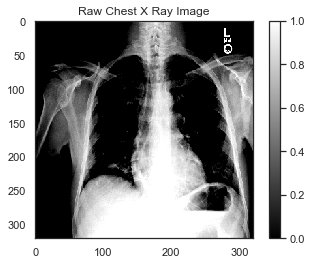

In [58]:
# Plot a processed image
sns.set_style("white")
generated_image, label = generator.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f'The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height')
print(f'The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}')
print(f'The mean value of the pixels is {generated_image.mean():.2f} and the standard deviation is {generated_image.std():.2f}')

## Comparison of the distribution of pixel values in the new pre-processed image versus the raw image

Text(0, 0.5, '# Pixels')

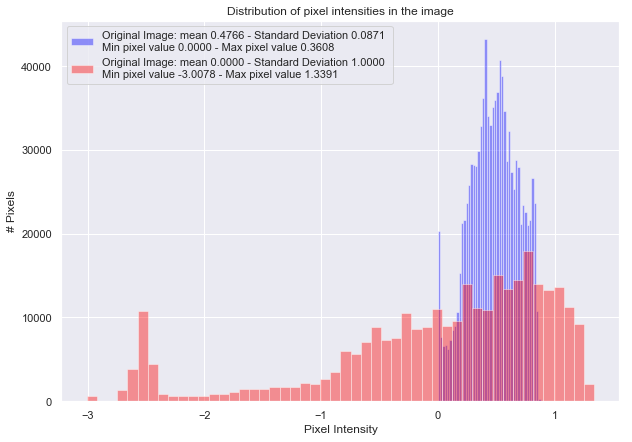

In [64]:
sns.set()
plt.figure(figsize=(10, 7))

# Plot histogram for original image
sns.distplot(raw_image.ravel(), 
             label=f'Original Image: mean {np.mean(raw_image):.4f} - Standard Deviation {np.std(raw_image[0]):.4f} \n'
             f'Min pixel value {np.min(raw_image[0]):.4f} - Max pixel value {np.max(raw_image[0]):.4f}',
             color='blue',
             kde=False)

# Plot histogram for generated image
sns.distplot(generated_image[0].ravel(), 
             label=f'Original Image: mean {np.mean(generated_image[0]):.4f} - Standard Deviation {np.std(generated_image[0]):.4f} \n'
             f'Min pixel value {np.min(generated_image[0]):.4f} - Max pixel value {np.max(generated_image[0]):.4f}',
             color='red',
             kde=False)

# Legend
plt.legend()
plt.title('Distribution of pixel intensities in the image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels')


# Class Imbalance Problem 

One way to tackle the class imbalance problem is to weight the losses differently. To choose the weights, we first need to calculate the class frequencies. 

In [65]:
# Count the number of instances of each class (drop non-class columns from the counts)
class_counts = train_df.sum().drop(['Image', 'PatientId'])

In [67]:
for column in class_counts.keys():
    print(f"The class {column} has {train_df[column].sum()} samples")

The class Atelectasis has 87 samples
The class Cardiomegaly has 17 samples
The class Consolidation has 29 samples
The class Edema has 15 samples
The class Effusion has 110 samples
The class Emphysema has 17 samples
The class Fibrosis has 13 samples
The class Hernia has 0 samples
The class Infiltration has 161 samples
The class Mass has 58 samples
The class Nodule has 55 samples
The class Pleural_Thickening has 29 samples
The class Pneumonia has 11 samples
The class Pneumothorax has 38 samples


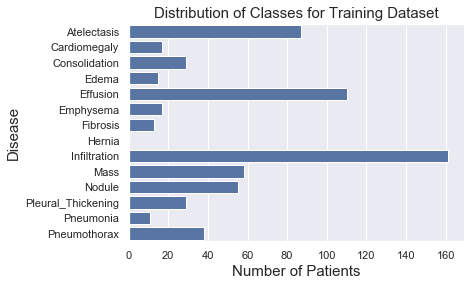

In [69]:
# Plot the distribution of the counts
sns.barplot(class_counts.values, class_counts.index, color='b')
plt.title('Distribution of Classes for Training Dataset', fontsize=15)
plt.xlabel('Number of Patients', fontsize=15)
plt.ylabel('Disease', fontsize=15)
plt.show()

## Weighted Loss Function

Below is an example of calculating weighted loss. For this case, we will first define a hypothetical set of true lables and then a set of random predictions. 

In [70]:
# Generate an array of 10 binary label values, 7 positive and 3 negative, then reshape to a column
y_true = np.array([1,1,1,1,1,1,1, 0, 0, 0]).reshape(10,1)
print(y_true, y_true.shape)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]] (10, 1)


In [71]:
# Generate an array of random predictions (either 0 or 0.9 for each) and reshape to a column
y_predict = np.random.randint(0, 2, 10).reshape(10,1)*0.9
print(y_predict, y_predict.shape)

[[0.9]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0.9]
 [0. ]
 [0. ]
 [0.9]] (10, 1)


Next, let's define positive and negative weights and a value for epsilon to be used in the loss function.

In [72]:
# Define positive and negative weights to be used in the loss function
# The positive weight is determined by the fraction of lables that are negative (3/10 in this case)
positive_weight = 0.3
# The negative weight is determined by the fraction of lables that are positive (7/10 in this case)
negative_weight = 0.7

In [73]:
# Define a value "epsilon" to be used in calculating the loss
# This values is just used to avoid an error due to taking the log of zero. 
epsilon = 1e-7

**Weighted Loss Equation**

Calculate the loss for zero-th label (column at index 0)

* The loss is made up of two terms:
    * $loss_{pos}$: we'll use this to refer to the loss where the actual lable is positive (the positive examples).
    * $loss_{neg}$: we'll use this to refer to the loss where the actual label is negative (the negative examples). 
* Note that witnin the $log()$ function, we'll add a tiny positive value to avoid an error if taking log taking the log of zero.

$$loss^{(i)} = loss^{(i)}_{pos}+loss^{(i)}_{neg}$$
$$loss^{(i)}_{pos}=-1 \times weight^{(i)} \times y^{(i)} \times log(\hat(y)^{(i)} + \epsilon)$$
$$loss^{(i)}_{neg}=-1 \times weight^{(i)}_{neg} \times (1-y^{(i)}) \times log(1 - \hat(y^{(i)}) + \epsilon)$$
$$\epsilon = \text{a tiny positive number}$$

In [75]:
# Calculate and print out the positive loss
positive_loss = -1 * np.sum(positive_weight * y_true * 
                            np.log(y_predict + epsilon))
positive_loss

24.24035971916551

In [76]:
# Calculate and print out the negative loss
negative_loss = -1 *np.sum(negative_weight * 
                          (1 - y_true) *
                          np.log(1 - y_predict + epsilon))
negative_loss

1.6118087250961888

In [77]:
# Sum positive and negative losses to calculate total loss
total_loss = positive_loss + negative_loss
print(total_loss)

25.8521684442617


# Convolution Neural Network

## Densenet

Using a pre-trained Densenet model for image classification. 

Densenet is a convolutional neural network where each layer is connected to all other layers that are deeper in the network. 

* The first layer is connected to the 3rd, 4th etc. 
* The second layer is connected to the 3rd, 4th, 5th etc. 

Like this:
<img src="densenet.png" width="400" align="middle"/>

For a detailed explanation of Densenet, check out the source of the image above, a paper by Gao Huang et al. 2018 called [Densely Connected Convolutional Networks] (https://arxiv.org/pdf/1608.06993.pdf).

In [80]:
# Import Densenet from Keras
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as k

We'll be loading a set of pre-trained weights to reduce training time. 

In [81]:
# Create the base pre-trained model
base_model = DenseNet121(weights=os.path.join(basepath, 'densenet.hdf5'), include_top=False)

W0422 10:45:35.375562 4657169856 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0422 10:45:35.442332 4657169856 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0422 10:45:35.473723 4657169856 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0422 10:45:35.511570 4657169856 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0422 10:45:35.512660 4657169856 deprecation_wrapper

View a summary of the model

In [82]:
# Print the model summary
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [83]:
# Print out the first five layers
layers_1 = base_model.layers

print("First 5 layers")
layers_1[0:5]

First 5 layers


In [85]:
# Print out the last five layers
print("last 5 layers")
layers_1[-6:-1]

last 5 layers


In [86]:
# Get the convolutional layers and print the first 5
conv2D_layers = [layer for layer in base_model.layers
                if str(type(layer)).find('Conv2D') > -1]
print("The first five conv2D layers")
conv2D_layers[0:5]

The first five conv2D layers


In [87]:
# Print out the total number of convolutional layers
print(f"There are {len(conv2D_layers)} convolutional layers")

There are 120 convolutional layers


In [88]:
# Print the number of channels in the input
print("The input has 3 channels")
base_model.input

The input has 3 channels


<tf.Tensor 'input_1:0' shape=(?, ?, ?, 3) dtype=float32>

In [92]:
# Print the number of output channels
print("The output has 124 channels")
x = base_model.output
x

The output has 124 channels


<tf.Tensor 'relu/Relu:0' shape=(?, ?, ?, 1024) dtype=float32>

In [93]:
# Add a global spatial average pooling layer
x_pool = GlobalAveragePooling2D()(x)
x_pool

<tf.Tensor 'global_average_pooling2d_2/Mean:0' shape=(?, 1024) dtype=float32>

In [94]:
# Define a set of five class labels to use as an example
labels = ['Emphysema',
          'Hernia',
          'Mass',
          'Pneumonia',
          'Edema']
n_classes = len(labels)
print(f"In this example, we want our model to identify {n_classes} classes")

In this example, we want our model to identify 5 classes


In [96]:
# Add a logistic layer with the same size as the number of classes we are trying to predict
predictions = Dense(n_classes, activation='sigmoid')(x_pool)
print(f"Predictions have {n_classes} units, one for each class")
predictions

Predictions have 5 units, one for each class


<tf.Tensor 'dense_2/Sigmoid:0' shape=(?, 5) dtype=float32>

In [97]:
# Create an updated model
model = Model(inputs=base_model.input, outputs=predictions)

In [98]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy')


W0422 11:15:09.932915 4657169856 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



# Patient Overlap and Data Leakage

Patient overlap in medical data is a part of a more general problem in machine learning called data leakage. The aim is to identify patient IDs appearing in both the training set and test set. We need to verify that we don't have patient overlap in the training and validation sets. 

In [99]:
# Read the csv file containing validation data
validation_file = "valid-small.csv"
valid_df = pd.read_csv(os.path.join(basepath, validation_file))
print(f'There are {valid_df.shape[0]} rows and {valid_df.shape[1]} columns in the validation dataframe')

There are 109 rows and 16 columns in the validation dataframe


**Extract and compare the patient ID columns from the train and validation sets**

The aim is to do the following:

1. Extract patient IDs from the train and validation sets
2. Convert these arrays of numbers into <mark>sets()</mark> datatypes for easy comparison
3. Identify patient overlap in the intersection of the two sets

In [100]:
# Extract patient id's from the training set
ids_train = train_df.PatientId.values
# Extract patient id's from the validation set
ids_valid = valid_df.PatientId.values

In [102]:
# Create a "set" datastructure of the training set id's to identify unique id's
ids_train_set = set(ids_train)
print(f'There are {len(ids_train_set)} unique Patient IDs in the training set')
ids_valid_set = set(ids_valid)
print(f'There are {len(ids_valid_set)} unique Patient IDs in the validation set')

There are 833 unique Patient IDs in the training set
There are 97 unique Patient IDs in the validation set


In [105]:
# Identify patient overlap by looking at the intersection between the sets 
patient_overlap = list(ids_train_set.intersection(ids_valid_set))
n_overlap = len(patient_overlap)
print(f'There are {n_overlap} Patient IDs in both the training and validation sets')
print('')
print(f'These patients are in both training and validation data sets')
print(f'{patient_overlap}')

There are 11 Patient IDs in both the training and validation sets

These patients are in both training and validation data sets
[18464, 2274, 13256, 13993, 16014, 28208, 17138, 15826, 28214, 8760, 23325]


**Identify rows (indices) of overlapping patients and remove from either the train or validation set

The aim is to do the following:
1. Create a list of the overlapping row numbers in both the training and validation sets.
2. Drop the overlapping patient records from the validation set (could also choose to drop from the training set). 

In [108]:
train_overlap_idxs = []
valid_overlap_idxs = []
for idx in range(n_overlap):
    train_overlap_idxs.extend(train_df.index[train_df['PatientId'] == patient_overlap[idx]].tolist())
    valid_overlap_idxs.extend(valid_df.index[valid_df['PatientId'] == patient_overlap[idx]].tolist())
    
print(f'These are the indices of overlapping patients in the training set:')
print(f'{train_overlap_idxs}')
print('These are the indices of overlapping patients in the validation set:')
print(f'{valid_overlap_idxs}')


These are the indices of overlapping patients in the training set:
[381, 863, 426, 499, 509, 674, 228, 736, 126, 350, 798, 253, 537, 151, 486, 329, 815, 48, 111, 194, 434, 100, 475]
These are the indices of overlapping patients in the validation set:
[46, 106, 51, 66, 71, 84, 24, 89, 12, 38, 96, 26, 75, 15, 61, 35, 97, 1, 9, 20, 52, 7, 60]


In [109]:
# Drop the overlapping rows from the validation set
valid_df.drop(valid_overlap_idxs, inplace=True)

In [111]:
# Cross-check if really don't have overlapping patient id in the validation dataset
ids_valid = valid_df.PatientId.values
# Create a "set" data structure of the validation set id's to identify unique id's
ids_valid_set = set(ids_valid)
print(f'There are {len(ids_valid_set)} unique patients in the validation dataframe')

There are 86 unique patients in the validation dataframe
